# Credit Score Classification Model Development

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the dataset to Pyhton Environment

In [3]:
dataset_path = "C:/Users/USER/OneDrive/Desktop/ICTAK_Internship\credit.csv"
df = pd.read_csv(dataset_path)

In [4]:
#Display the first five rows
pd.set_option('display.max_columns', None)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### The dataset comprises of float,integer and string values and there are no missing or null values

In [7]:
df.shape

(100000, 28)

In [8]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### There are no dulpicate rows in the dataset

In [11]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
#Seperating categorical and numerical columns for analysis

catg_col = df.select_dtypes(include =["object"]).columns
print(catg_col)

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [13]:
num_col = df.select_dtypes(exclude =["object"]).columns
print(num_col)

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


In [14]:
print("Number of Categorical columns:",len(catg_col))
print("Number of Numerical columns:",len(num_col))

Number of Categorical columns: 7
Number of Numerical columns: 21


## Exploratory Data Analysis

In [15]:
#unique values in each column
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [16]:
df.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

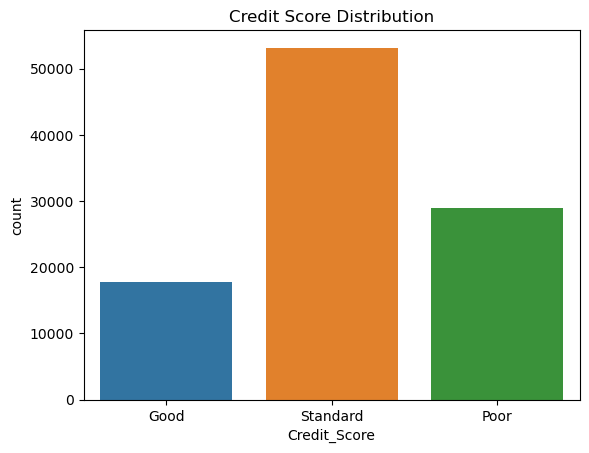

In [17]:
# Visualize the distribution of the target variable (credit score)
sns.countplot(x='Credit_Score', data=df)
plt.title('Credit Score Distribution')
plt.show()

#### There is an imbalance between the count of each score

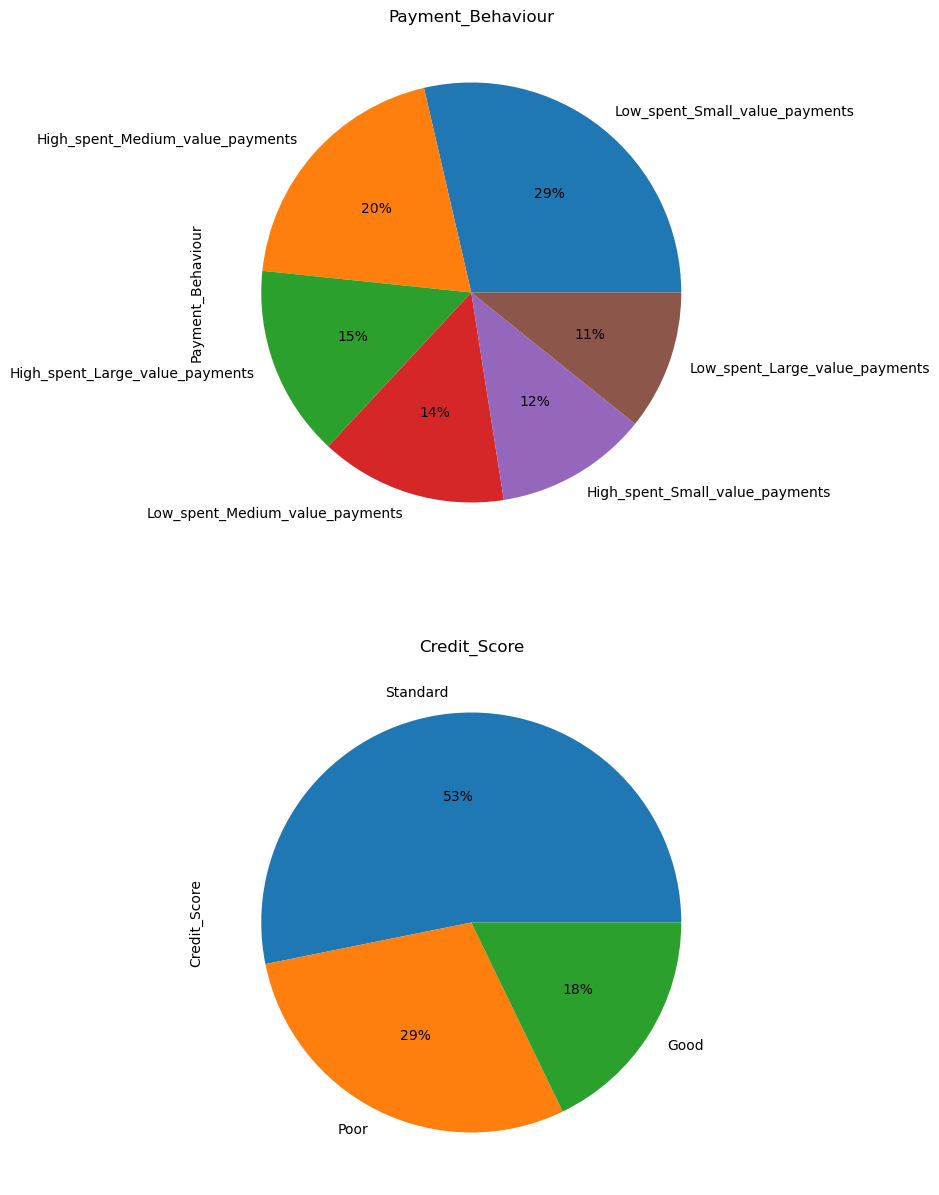

In [18]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()
pie_plot(df, ['Payment_Behaviour', 'Credit_Score'], 2,1)    

Standard is the most frequent class and Good is the least frequent class.
There's a big percentage difference between the classes, which should to be taken into account when building a model

<Axes: xlabel='Occupation', ylabel='count'>

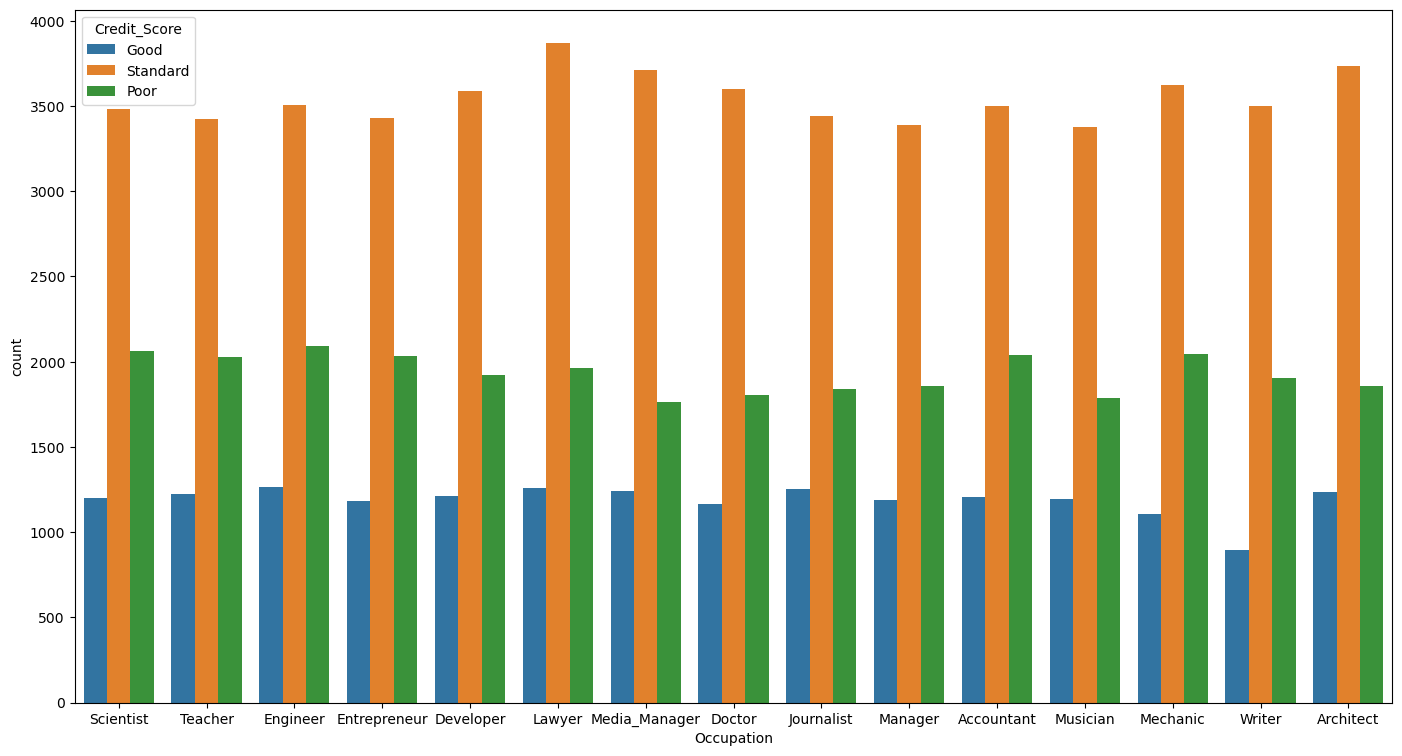

In [19]:
#Barplot showing credit score for different occupation
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Score")

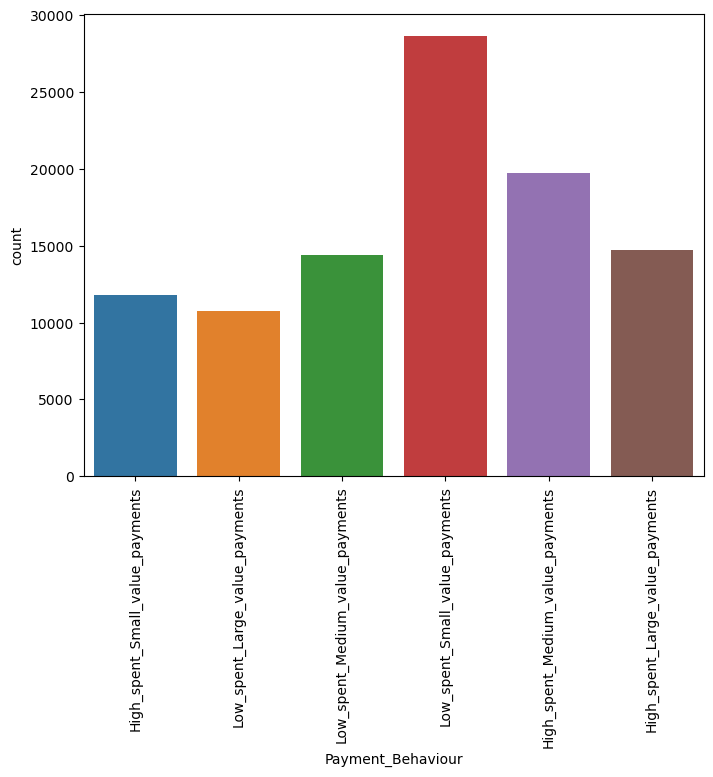

In [20]:
#Plot to show payment behaviour
plt.figure(figsize=(8,6))
sns.countplot(x='Payment_Behaviour', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

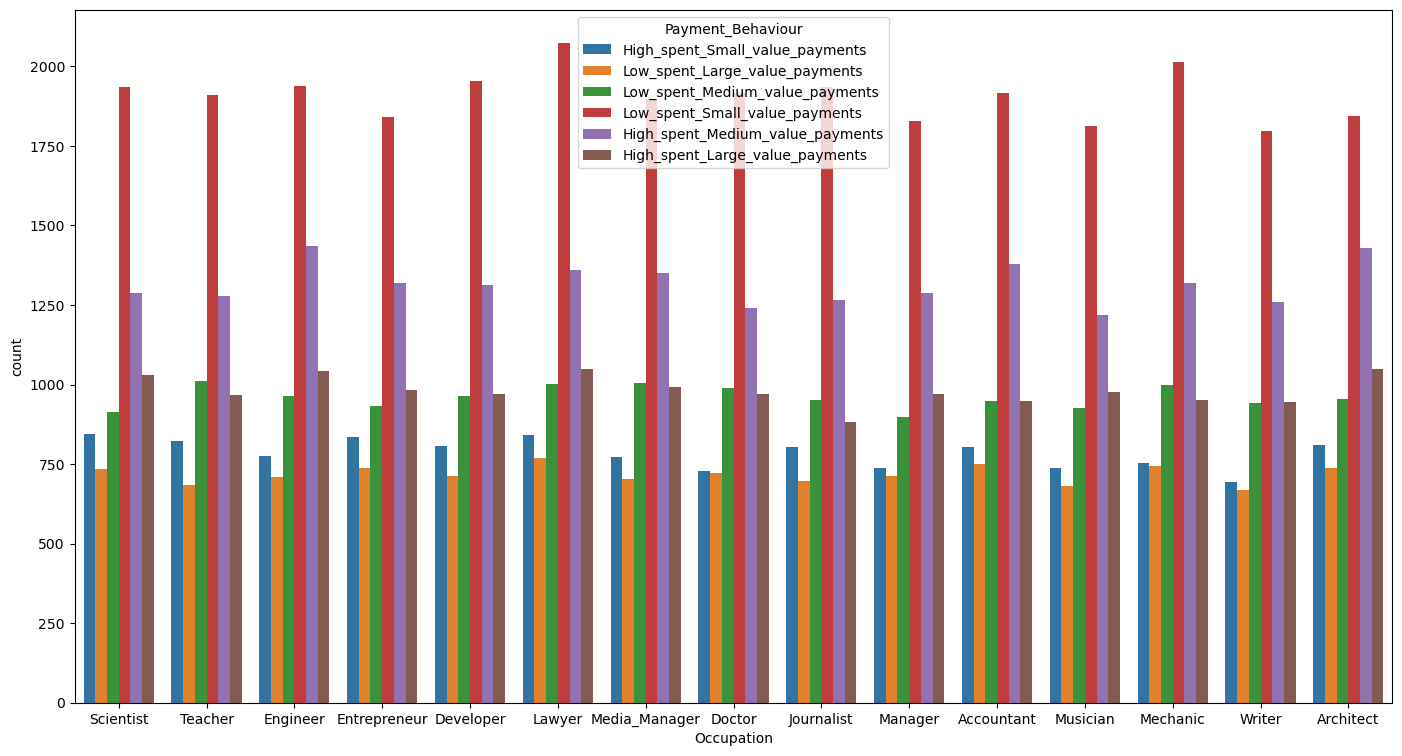

In [21]:
#Plot showing payment behaviour of different occupation
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_Behaviour")

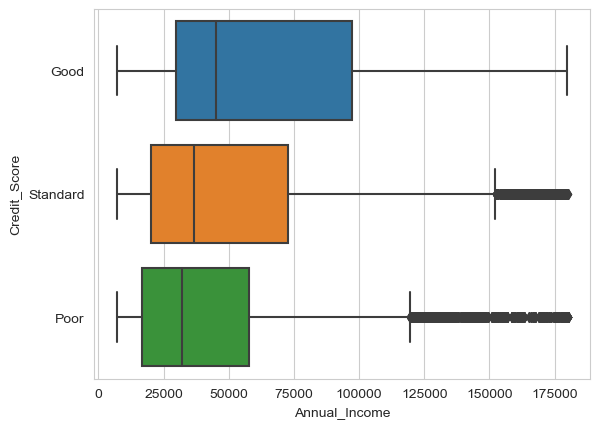

In [22]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="Annual_Income", y="Credit_Score", data=df)

People with more annual income has better credit score

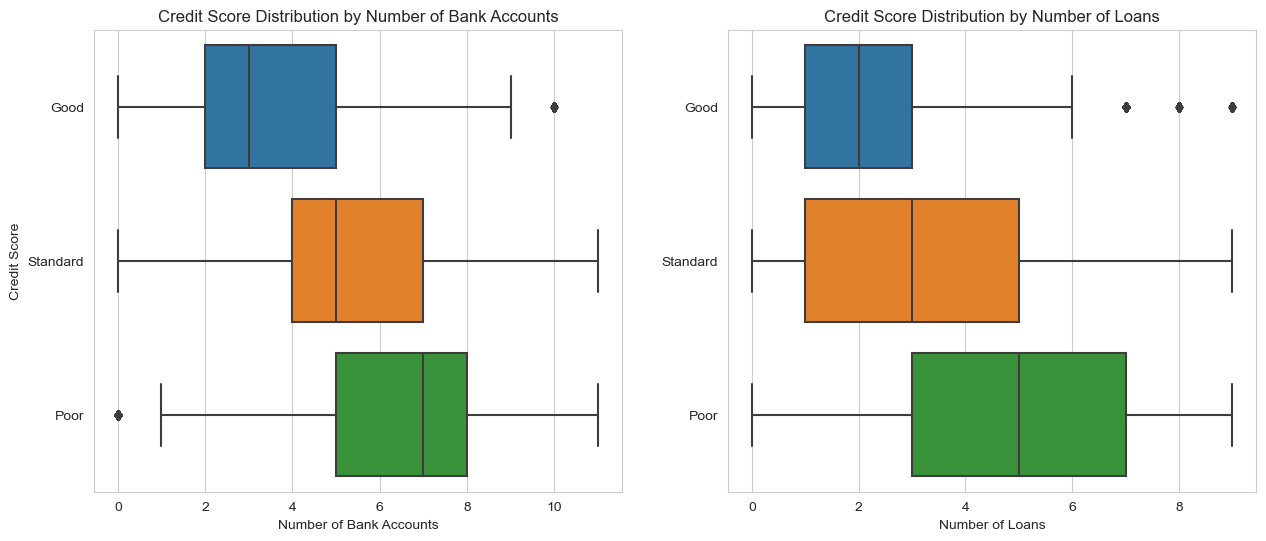

In [23]:
sns.set_style("whitegrid")
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first box plot on the left subplot
sns.boxplot(x="Num_Bank_Accounts", y="Credit_Score", data=df, ax=axes[0])
axes[0].set_title("Credit Score Distribution by Number of Bank Accounts")
axes[0].set_xlabel("Number of Bank Accounts")
axes[0].set_ylabel("Credit Score")

# Plot the second box plot on the right subplot
sns.boxplot(x="Num_of_Loan", y="Credit_Score", data=df, ax=axes[1])
axes[1].set_title("Credit Score Distribution by Number of Loans")
axes[1].set_xlabel("Number of Loans")
axes[1].set_ylabel("")  # Clear y-axis label for better visualization

plt.show()

Having more bank account and credit card is not good for having a good credit score.

A person should have 2 to 3 bank accounts and 4 to 5 credit cards only.

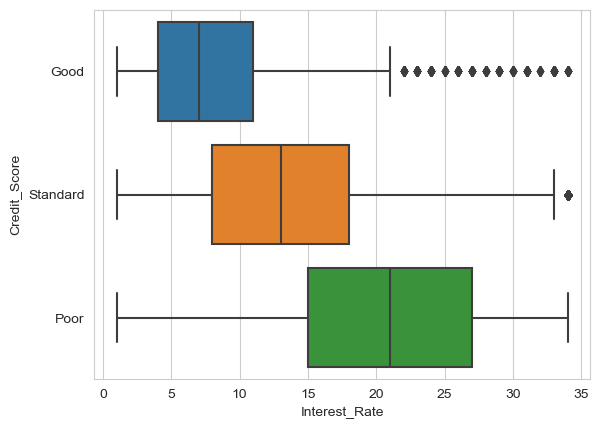

In [24]:
ax= sns.boxplot(x="Interest_Rate",y="Credit_Score",data=df)

If the interest rate is 5 – 12%, the credit score is good. Having an interest rate of more than 15% is bad for your credit scores.

C:\Users\USER\AppData\Local\Temp\ipykernel_32812\2097848490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

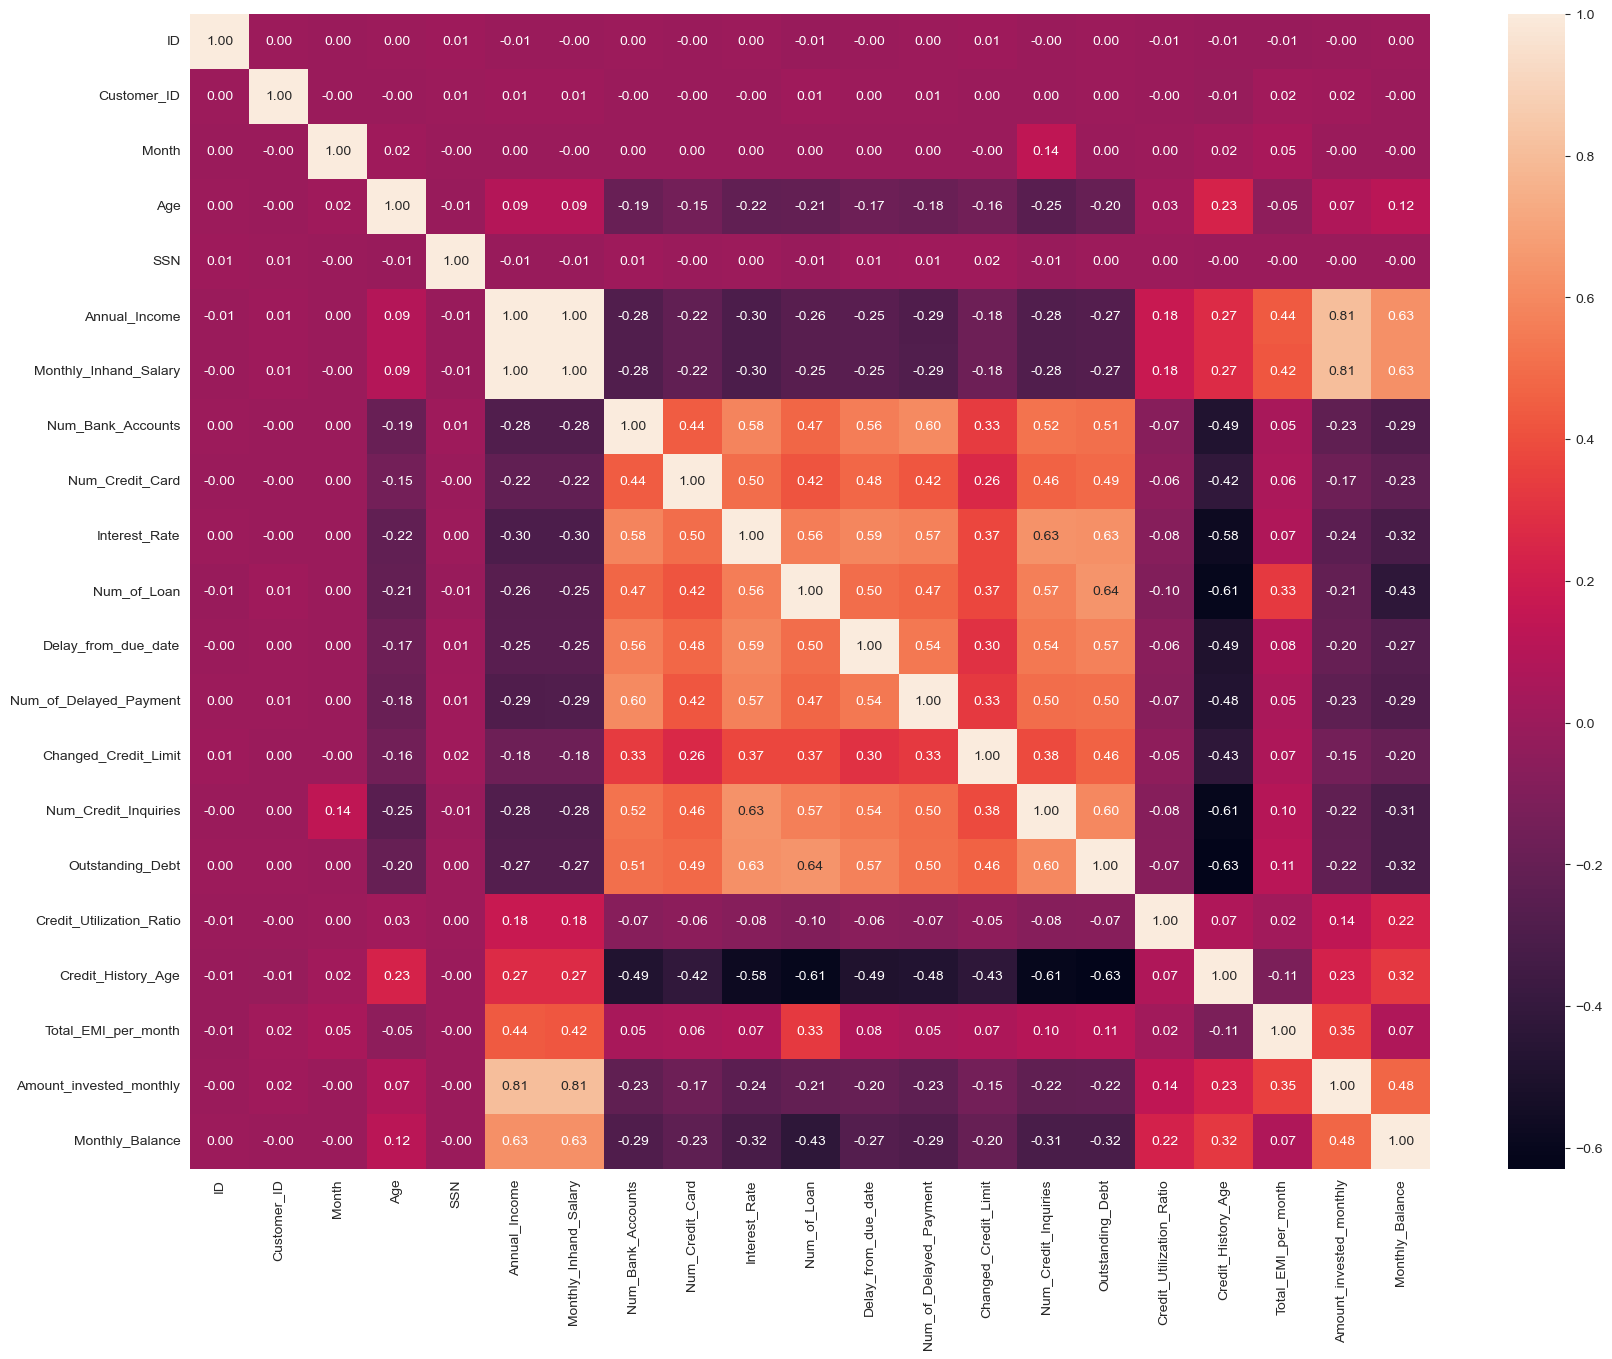

In [25]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, fmt='.2f')

Dropping columns with unique value for each row and that with high corelation

In [26]:
#Dropping columns with unique value for each row and that with high corelation
data = df.drop(["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary",],axis=1) 
data

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",23.0,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,5,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,6,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,7,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [27]:
#drop the type of loans as this will not be contributing to the Credit score
data.drop(columns=['Type_of_Loan'],inplace = True)

In [28]:
data.shape

(100000, 22)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

### Encoding of Data

In [30]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [31]:
data["Credit_Score"] = le.fit_transform(data["Credit_Score"])
data["Payment_Behaviour"] = le.fit_transform(data["Payment_Behaviour"])
data["Payment_of_Min_Amount"] = le.fit_transform(data["Payment_of_Min_Amount"])
data["Credit_Mix"] = le.fit_transform(data["Credit_Mix"])
data['Occupation'] = le.fit_transform(data['Occupation'])

Text(0.5, 1.0, 'Correlation Heatmap')

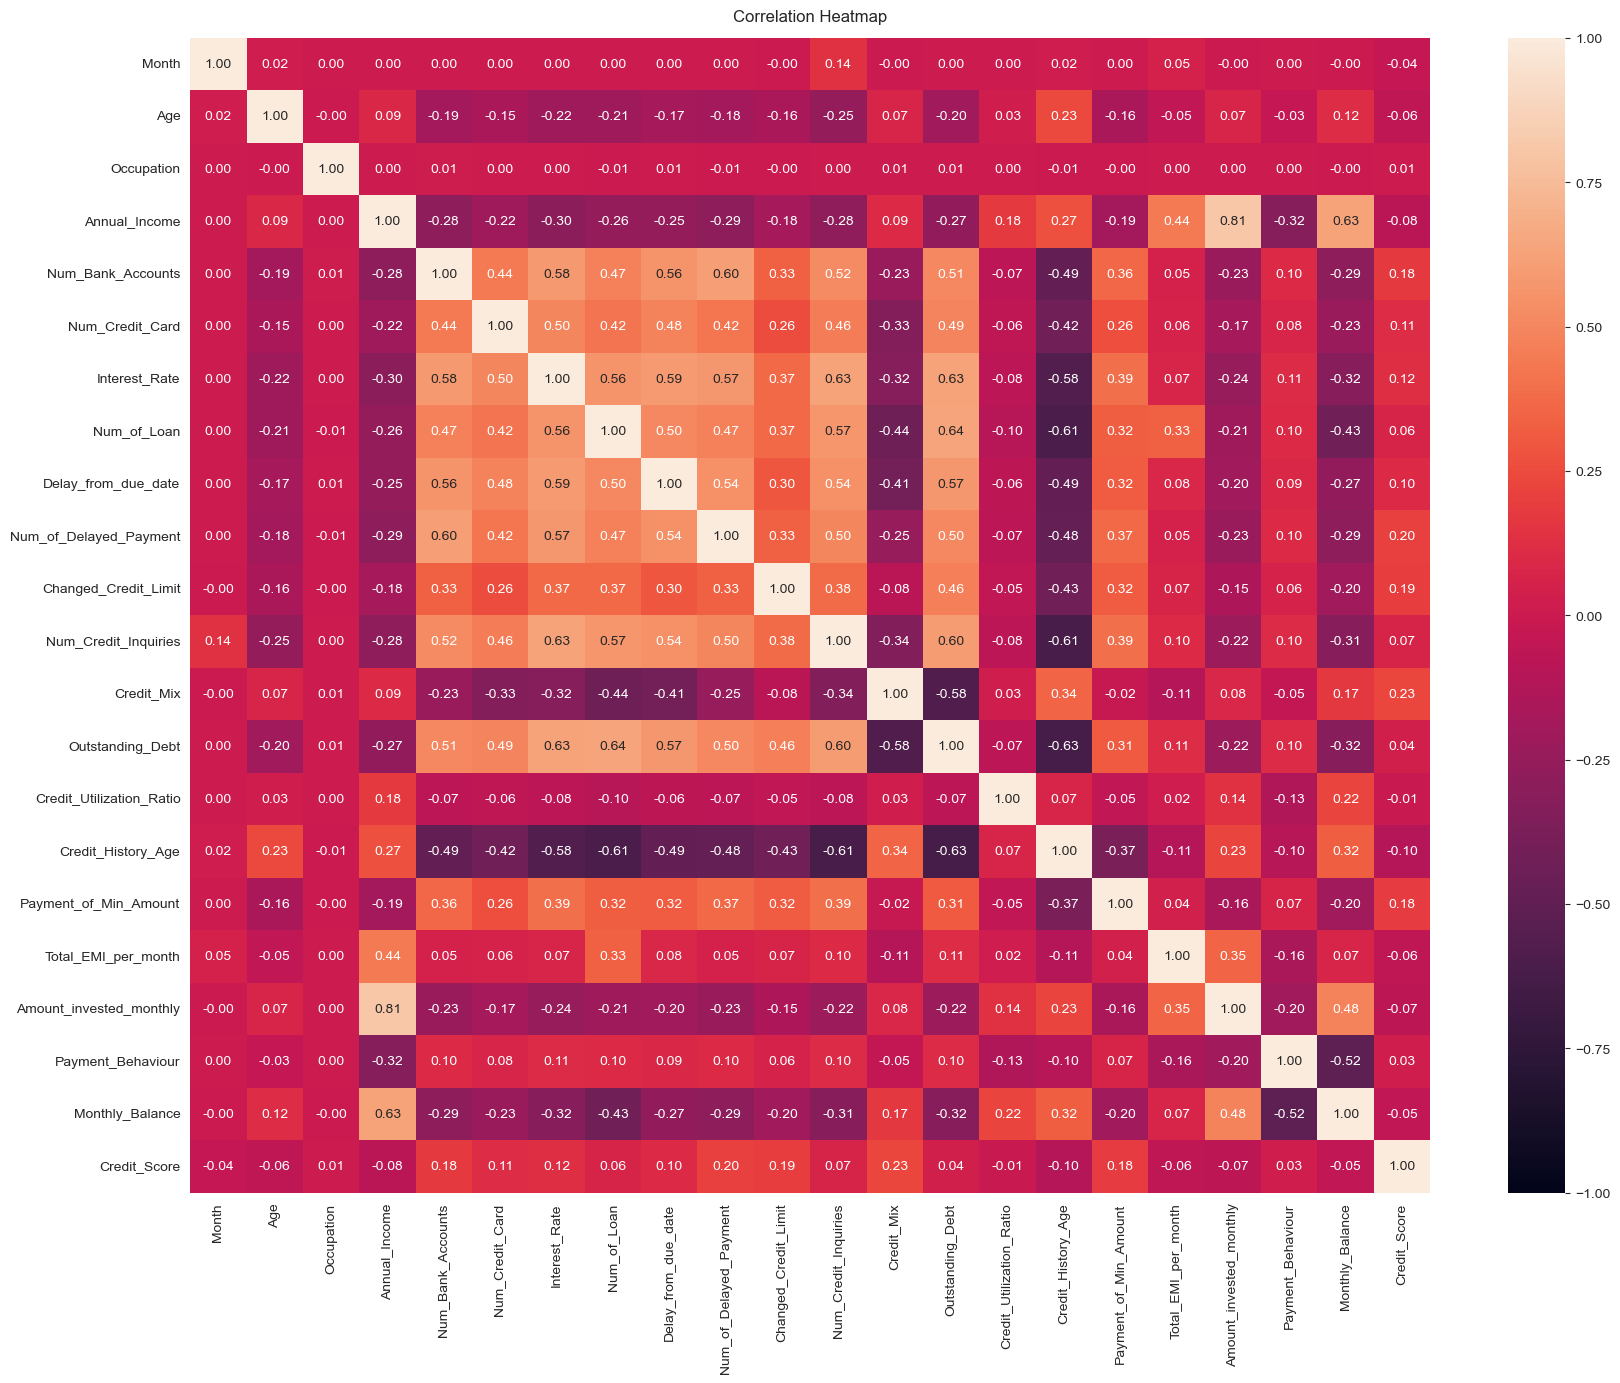

In [32]:
#Co-relation matrix
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  int32  
 13  Outstanding_Debt          100000 non-null  fl

### Data Splitting

In [34]:
# X holds all independent variable and y is the dependent variable('Credit_Score')

X = data.drop(['Credit_Score'],axis =1)
y = data['Credit_Score']    

In [35]:
X.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,1,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089
1,2,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162
2,3,23.0,12,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863
3,4,23.0,12,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310
4,5,23.0,12,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231


In [36]:
#Standard Scaling

from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_data = s_scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.25, random_state = 42)

### Up-Sampling of Data

In [39]:
from imblearn.over_sampling import SMOTE 
#Imports the SMOTE (Synthetic Minority Over-sampling Technique), which is used for oversampling the minority class.

In [40]:
# Upsample the minority class using SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [41]:
from sklearn.utils import class_weight 
#Imports the class_weight module from scikit-learn, which provides utilities for dealing with class imbalance

In [42]:
# Compute class weights

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train) 

#Computes the class weights for each class in the target variable y_train
#The 'balanced' option instructs scikit-learn to compute class weights inversely proportional to class frequencies, effectively assigning higher weights to minority classes.

In [43]:
class_weights

array([1.86483664, 1.15287065, 0.62642512])

## Model Selection and Model Evaluvation

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [46]:
# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

In [54]:
# Train the model using the resampled data

model = logistic_model.fit(X_train_resampled, y_train_resampled)

In [55]:
y_pred = model.predict(X_test)

In [108]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy Score of Logistic Regression =', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.82      0.62      4422
           1       0.62      0.67      0.64      7313
           2       0.79      0.59      0.68     13265

    accuracy                           0.65     25000
   macro avg       0.64      0.69      0.65     25000
weighted avg       0.69      0.65      0.66     25000

Accuracy Score of Logistic Regression = 0.652


### KNNeighbors Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
metric_k = [] 
neighbors = np.arange(3,15) 
for k in neighbors: 
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    model_knn = classifier.fit(X_train,y_train) 
    y_pred_knn = model_knn.predict(X_test) 
    acc = accuracy_score(y_test,y_pred_knn) 
    print('Neighbor', k, '= :',acc) 
    metric_k.append(acc)

Neighbor 3 = : 0.73724
Neighbor 4 = : 0.73672
Neighbor 5 = : 0.7318
Neighbor 6 = : 0.733
Neighbor 7 = : 0.72848
Neighbor 8 = : 0.72708
Neighbor 9 = : 0.72432
Neighbor 10 = : 0.7242
Neighbor 11 = : 0.72052
Neighbor 12 = : 0.721
Neighbor 13 = : 0.71664
Neighbor 14 = : 0.71712


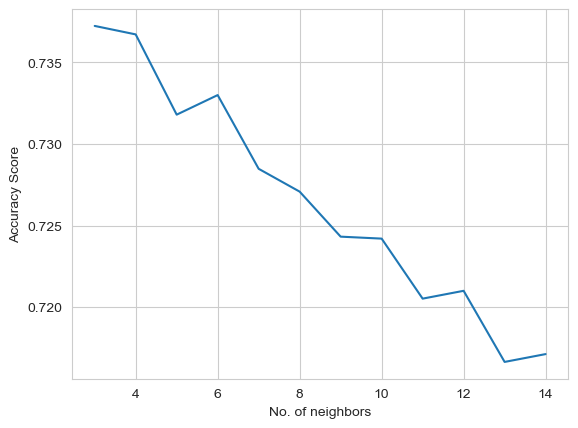

In [102]:
plt.plot(neighbors, metric_k) 
plt.xlabel('No. of neighbors') 
plt.ylabel('Accuracy Score') 
plt.show()

In [103]:
classifier =KNeighborsClassifier(n_neighbors= 4,metric='euclidean') 
classifier.fit(X_train,y_train) 
y_pred_KNN = classifier.predict(X_test) 
acc = accuracy_score(y_test,y_pred_KNN) 
metric_k.append(acc)

In [105]:
print(classification_report(y_test, y_pred_KNN))
print('Accuracy Score of KNN Algorithm =',accuracy_score(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      4422
           1       0.70      0.78      0.74      7313
           2       0.81      0.71      0.76     13265

    accuracy                           0.74     25000
   macro avg       0.71      0.74      0.73     25000
weighted avg       0.75      0.74      0.74     25000

Accuracy Score of KNN Algorithm = 0.73672


### Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt_cls = DecisionTreeClassifier(random_state =42)

In [87]:
model_dt = dt_cls.fit(X_train_resampled, y_train_resampled)

In [89]:
y_pred_dt = model.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred_dt))
print('Accuracy Score of Decision Tree Classifier =', accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.49      0.82      0.62      4422
           1       0.62      0.67      0.64      7313
           2       0.79      0.59      0.68     13265

    accuracy                           0.65     25000
   macro avg       0.64      0.69      0.65     25000
weighted avg       0.69      0.65      0.66     25000

Accuracy Score of Decision Tree Classifier = 0.652


### Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_cls = RandomForestClassifier()

In [93]:
model_rf = rf_cls.fit(X_train_resampled, y_train_resampled)

In [94]:
y_pred_rf = model_rf.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred_rf))
print('Accuracy Score of Random Forest Classifier =',accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      4422
           1       0.80      0.87      0.83      7313
           2       0.87      0.80      0.83     13265

    accuracy                           0.83     25000
   macro avg       0.81      0.83      0.82     25000
weighted avg       0.83      0.83      0.83     25000

Accuracy Score of Random Forest Classifier = 0.82608


In [112]:
print('ACCURACY SCORES OF DIFFERENT ALGORITHMS') 
print('Random Forest Classifier: {:.2%}'.format(accuracy_score(y_test,y_pred_rf))) 
print('Decision Tree Classifier: {:.2%}'.format(accuracy_score(y_test,y_pred_dt)))  
print('KNN Algorithm: {:.2%} '.format(accuracy_score(y_test,y_pred_KNN))) 
print('Logistic Regression: {:.2%}'.format(accuracy_score(y_test,y_pred)))

ACCURACY SCORES OF DIFFERENT ALGORITHMS
Random Forest Classifier: 82.61%
Decision Tree Classifier: 65.20%
KNN Algorithm: 73.67% 
Logistic Regression: 65.20%


#### Among the above classification methods, Random Forest Classifier gives higher accuracy.

In [113]:
from sklearn.model_selection import GridSearchCV 

In [118]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV( rf, param_grid, cv = 5, scoring ='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
# Access the best parameters and best score 
best_params = grid_search.best_params_ 
best_score = grid_search.best_score_ 

print("Best Parameters:", best_params) 
print("Best Accuracy:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8148133333333334
